In [8]:

from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras import backend as K
from keras.optimizers import Adam




from tensorflow.examples.tutorials.mnist import input_data # import data from tensorflow library 

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # downloading data and generating onehot 
                                                               #encoded labels
x_train = mnist.train.images # training data features (Images)
y_train= mnist.train.labels # Label class for training image
x_test = mnist.test.images   # Testing data
y_test = mnist.test.labels   # Testing Class label
x_valid= mnist.validation.images # Validation data
y_valid   = mnist.validation.labels # Validation class label
img_rows, img_cols = 28, 28

x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))
x_valid=x_valid.reshape((x_valid.shape[0],28,28,1))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_valid = x_valid.astype('float32')
x_train /= 255
x_test /= 255
x_valid /=255

input_shape = x_train.shape[1:]
print(input_shape)
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


batch_size = 128
num_classes = 10
epochs = 12
# In[23]:


 #Model type
model = Sequential()
# Conv layer 32 filters of size 3*3 Input shape is (None, 28,28,1)
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Flatten())# Flattening data (2d to vector form)
# Model .Layer type (hidden units, activation function)
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5)) # Freezing parameter while training

#last layer with 10 outputs and softmax function
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(0.001, beta_1=0.9, beta_2=0.999) # Adam Optimizer
model.compile(loss=keras.losses.categorical_crossentropy, #Catagorical Crossentropy
              optimizer=optimizer, 
              metrics=['accuracy']) #Print Accuracy




Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(28, 28, 1)
x_train shape: (55000, 28, 28, 1)
55000 train samples
10000 test samples


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
flatten_4 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)               10816500  
_________________________________________________________________
dropout_7 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_8 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5010      
Total para

In [10]:
history = model.fit(x_train, y_train,#Training Input 
          batch_size=batch_size, # batch_size 
          epochs=epochs,#Epochs
          verbose=1, # print Mode  "progress bar"
          validation_data=(x_valid, y_valid)) # Validation Data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 55000 samples, validate on 5000 samples
Epoch 1/12
55000/55000 [==============================] - 5s 87us/step - loss: 0.8268 - acc: 0.7310 - val_loss: 0.2902 - val_acc: 0.9162
Epoch 2/12
55000/55000 [==============================] - 4s 76us/step - loss: 0.2869 - acc: 0.9130 - val_loss: 0.1768 - val_acc: 0.9486
Epoch 3/12
55000/55000 [==============================] - 4s 76us/step - loss: 0.2026 - acc: 0.9396 - val_loss: 0.1297 - val_acc: 0.9606
Epoch 4/12
55000/55000 [==============================] - 4s 76us/step - loss: 0.1621 - acc: 0.9507 - val_loss: 0.1088 - val_acc: 0.9674
Epoch 5/12
55000/55000 [==============================] - 4s 76us/step - loss: 0.1367 - acc: 0.9588 - val_loss: 0.0966 - val_acc: 0.9716
Epoch 6/12
55000/55000 [==============================] - 4s 76us/step - loss: 0.1209 - acc: 0.9637 - val_loss: 0.0856 - val_acc: 0.9730
Epoch 7/12
55000/55000 [==============================] - 4s 75us/step - loss: 0.1077 - acc: 0.9675 - val_loss: 0.0751 - val_acc:

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


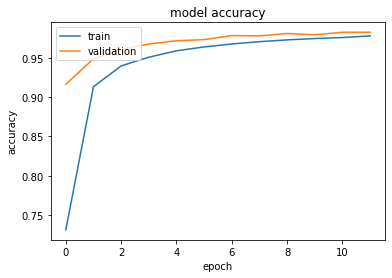

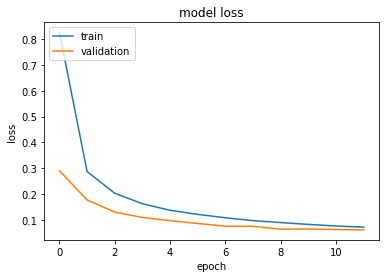

In [12]:
from matplotlib import pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()